In [131]:
# from sklearn.datasets import load_diabetes
# X,y = load_diabetes(return_X_y=True)
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
data = pd.read_csv("Housing.csv")
data.head(100)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3,2,3,yes,no,no,no,yes,2,no,semi-furnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
97,6300000,6400,3,1,1,yes,yes,yes,no,yes,1,yes,semi-furnished
98,6293000,6600,3,2,3,yes,no,no,no,yes,0,yes,unfurnished


In [132]:
# X = data.drop(columns=['price','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'])
X = data['area']
y = data['price']

# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)

X = X.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (436, 1)
Shape of X_test: (109, 1)
Shape of y_train: (436,)
Shape of y_test: (109,)


In [133]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
mod = KNeighborsRegressor()
mod.fit(X_train, y_train)

# Determine numeric and categorical features
# numeric_features = X.select_dtypes(include=['number']).columns.tolist()
# categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),  # Numeric features are scaled
#         ('cat', OneHotEncoder(), categorical_features)  # Categorical features are one-hot encoded
#     ])

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=1))
])
pipe.get_params()

# Fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [134]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

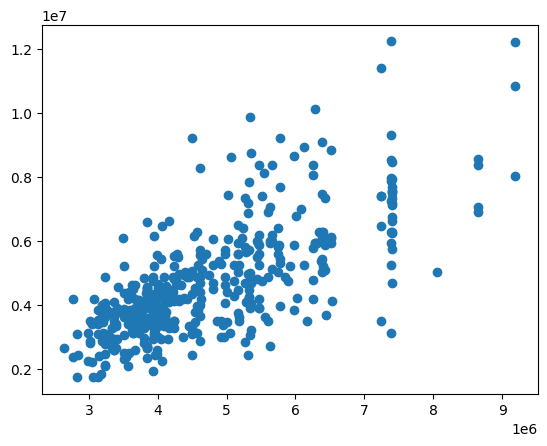

In [135]:
pred = mod.predict(X_train)
plt.scatter(pred, y_train)

In [136]:
grid_search = GridSearchCV(estimator = pipe,
             param_grid = {'model__n_neighbors':[1,2,3,4,5,6,7,8]},
             cv = 3)#set cross validation parameter to 3
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [137]:
cv_results = grid_search.cv_results_
pd.DataFrame(cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001890,0.000261,0.001363,0.000164,1,{'model__n_neighbors': 1},-0.148673,-0.582789,-0.002477,-0.244647,0.246440,8
1,0.001145,0.000388,0.001013,0.000567,2,{'model__n_neighbors': 2},0.042302,-0.016319,0.118903,0.048295,0.055367,7
2,0.000336,0.000018,0.000316,0.000055,3,{'model__n_neighbors': 3},0.228994,0.195952,0.224069,0.216339,0.014555,6
3,0.000314,0.000003,0.000287,0.000017,4,{'model__n_neighbors': 4},0.259066,0.207303,0.284787,0.250385,0.032223,5
4,0.000314,0.000019,0.000287,0.000016,5,{'model__n_neighbors': 5},0.276143,0.314153,0.340919,0.310405,0.026577,4
5,0.000320,0.000018,0.000281,0.000015,6,{'model__n_neighbors': 6},0.278146,0.319531,0.380464,0.326047,0.042025,3
6,0.000328,0.000014,0.000284,0.000011,7,{'model__n_neighbors': 7},0.273732,0.357945,0.372817,0.334832,0.043628,1
7,0.000319,0.000018,0.000282,0.000016,8,{'model__n_neighbors': 8},0.246067,0.360627,0.373625,0.326773,0.057314,2


In [32]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X,y)


LinearRegression()

In [33]:
mod.predict(X)

array([206.11667725,  68.07103297, 176.88279035, 166.91445843,
       128.46225834, 106.35191443,  73.89134662, 118.85423042,
       158.80889721, 213.58462442,  97.07481511,  95.10108423,
       115.06915952, 164.67656842, 103.07814257, 177.17487964,
       211.7570922 , 182.84134823, 148.00326937, 124.01754066,
       120.33362197,  85.80068961, 113.1134589 , 252.45225837,
       165.48779206, 147.71997564,  97.12871541, 179.09358468,
       129.05345958, 184.7811403 , 158.71516713,  69.47575778,
       261.50385365, 112.82234716,  78.37318279,  87.66360785,
       207.92114668, 157.87641942, 240.84708073, 136.93257456,
       153.48044608,  74.15426666, 145.62742227,  77.82978811,
       221.07832768, 125.21957584, 142.6029986 , 109.49562511,
        73.14181818, 189.87117754, 157.9350104 , 169.55699526,
       134.1851441 , 157.72539008, 139.11104979,  72.73116856,
       207.82676612,  80.11171342, 104.08335958, 134.57871054,
       114.23552012, 180.67628279,  61.12935368,  98.72

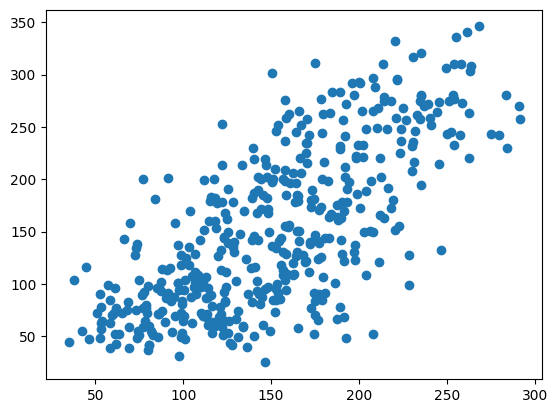

In [34]:
import matplotlib.pyplot as plt

pred = mod.predict(X)
plt.scatter(pred, y)